## Mutiple Files 

In [59]:
import numpy as np
import pandas as pd
import matplotlib

## Merge Practice

In [60]:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [61]:
b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926


### Inner Merge Practice

In [62]:
merged_df = pd.concat([a_df,b_df], axis='columns')
merged_df

,Country,Population (M),Capital,Country,HDI
0,Germany,82.8,Berlin,Germany,0.936
1,France,67.2,Paris,France,0.901
2,Belgium,11.4,Brussels,Belgium,0.916
3,Finland,5.5,Helsinki,Canada,0.926


### only kept the rows that had a value in the Column we merged on that exists in botha_df and b_df.



In [63]:
inner_merged_df = a_df.merge(b_df, how='inner')
inner_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916


#### Check your code

In [64]:
from nbresult import ChallengeResult

result = ChallengeResult('inner_merge',
    inner_merged_shape=inner_merged_df.shape,
    inner_merged_nulls=sum(inner_merged_df.isnull().sum())
)
result.write()

print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/02-Data-Toolkit/01-Data-Analysis/04-Multiple-Files-With-Pandas
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 2 items

tests/test_inner_merge.py::TestInnerMerge::test_inner_merged_nulls PASSED [ 50%]
tests/test_inner_merge.py::TestInnerMerge::test_inner_merged_shape PASSED [100%]

============================== 2 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/inner_merge.pickle

git commit -m 'Completed inner_merge step'

git push origin master


### Left Merge Practice

In [65]:
left_merged_df = a_df.merge(b_df, how='left')
left_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN


In [66]:
from nbresult import ChallengeResult

result = ChallengeResult('left_merge',
    left_merged_shape=left_merged_df.shape,
    left_merged_nulls=sum(left_merged_df.isnull().sum())
)
result.write()
  
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/02-Data-Toolkit/01-Data-Analysis/04-Multiple-Files-With-Pandas
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 2 items

tests/test_left_merge.py::TestLeftMerge::test_left_merged_df_shape PASSED [ 50%]
tests/test_left_merge.py::TestLeftMerge::test_left_merged_nulls PASSED   [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/left_merge.pickle

git commit -m 'Completed left_merge step'

git push origin master


### Right Join


In [67]:
#prend tout de b_df

In [68]:
right_merged_df = a_df.merge(b_df, how='right')
right_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Canada,NaN,NaN,0.926


### Outer Merge

In [ ]:
#va prendre tout
#Finally, there is the outer merge which will keep all the rows from both a_df and b_df

In [69]:
outer_merged_df = a_df.merge(b_df,on='Country', how='outer')
outer_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN
4,Canada,NaN,NaN,0.926


## Join Practice

In [70]:
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [71]:
aa_df = a_df.set_index("Country")
aa_df

,Population (M),Capital
Country,,
Germany,82.8,Berlin
France,67.2,Paris
Belgium,11.4,Brussels
Finland,5.5,Helsinki


In [72]:
bb_df = b_df.set_index("Country")
bb_df

,HDI
Country,
Germany,0.936
France,0.901
Belgium,0.916
Canada,0.926


In [73]:
#how to join with our new set indexes 
b_df.set_index("Country").join(a_df.set_index("Country"))

,HDI,Population (M),Capital
Country,,,
Germany,0.936,82.8,Berlin
France,0.901,67.2,Paris
Belgium,0.916,11.4,Brussels
Canada,0.926,NaN,NaN


## Concat Practice

In [74]:
concat_df = pd.concat([a_df, b_df], axis="index", sort=False)
concat_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN
0,Germany,NaN,NaN,0.936
1,France,NaN,NaN,0.901
2,Belgium,NaN,NaN,0.916
3,Canada,NaN,NaN,0.926


In [75]:
concat_d = pd.concat([a_df, b_df],axis="index")
concat_d 

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN
0,Germany,NaN,NaN,0.936
1,France,NaN,NaN,0.901
2,Belgium,NaN,NaN,0.916
3,Canada,NaN,NaN,0.926


## Olympic Sports and Medals, 1896-2014

In [34]:
import csv 

In [76]:
summer_df =pd.read_csv('summer.csv')
summer_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [77]:
winter_df = pd.read_csv('winter.csv')
winter_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [89]:
countries_df = pd.read_csv('dictionary.csv')
countries_df

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [79]:
winter_df

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [85]:
winter_df = pd.read_csv('winter.csv')
winter_df.rename(columns={"Country": "Code"}, inplace=True)

In [86]:
winter_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [87]:
summer_df = pd.read_csv('summer.csv')
summer_df.rename(columns={"Country": "Code"}, inplace=True)
summer_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [101]:
countries_df.head(3)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232


In [102]:
summer_df.head(3)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze


In [ ]:
#la colonne commune à ces deux dataframes est 'Code'

### Combining The Data

In [100]:
summer_countries_df = summer_df.merge(countries_df, on="Code")
summer_countries_df 

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.543460
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.543460
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.543460
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.543460
...,...,...,...,...,...,...,...,...,...,...,...,...
25737,2012,London,Athletics,Athletics,"BARRONDO, Erick",GUA,Men,20KM Walk,Silver,Guatemala,16342897.0,3903.478856
25738,2012,London,Athletics,Athletics,"JAMES, Kirani",GRN,Men,400M,Gold,Grenada,106825.0,9212.020352
25739,2012,London,Athletics,Athletics,"AMOS, Nijel",BOT,Men,800M,Silver,Botswana,2262485.0,6360.138220
25740,2012,London,Sailing,Sailing,"KONTIDES, Pavlos",CYP,Men,Laser,Silver,Cyprus,1165300.0,23242.840069


In [113]:
winter_countries_df = pd.concat([winter_df, summer_df], axis="index", sort=False)
winter_countries_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [117]:
winter_countries_df['Season'] = 'Summer'
#summer_countries_df["Season"] = "Summer"
winter_countries_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,Summer
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,Summer
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,Summer
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,Summer
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold,Summer


In [120]:
summer_countries_df['Season'] = 'summer'
summer_countries_df.head(3)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346,summer
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346,summer
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346,summer


In [130]:
all_df = pd.concat([summer_countries_df,winter_countries_df], axis="index", sort=False)
all_df.head(2)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346,summer
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346,summer


### Top Countries Analysis

In [137]:

#ascending false pour avoir un ordre décroissant :) 
all_count_df = all_df[all_df["Year"] >= 1984] \
    .groupby(["Country"]) \
    .count()[["Medal"]] \
    .sort_values(by="Medal", ascending=False)
top_10_df = all_count_df.head(10)

In [138]:
all_count_df.head(10)

,Medal
Country,
United States,2087
Australia,876
China,807
Germany,785
Russia,768
United Kingdom,516
"Korea, South",500
Italy,486
France,482


In [ ]:
#boolean indexing pour mettre la condition des années au dessus de 1984
#group by les countries
#.count()[["Medal"]] 

<AxesSubplot:xlabel='Country'>

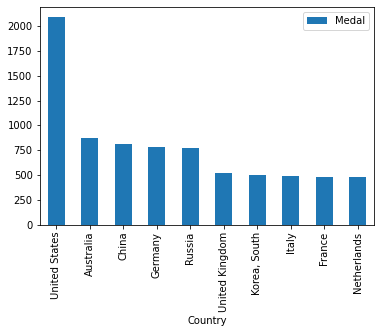

In [139]:
top_10_df.plot(kind="bar")

### Top 10 Countries (by Season) since 1984

In [146]:
all_df = pd.concat([summer_countries_df,winter_countries_df])

In [148]:
top_10_season_df_count = all_df.count()[["Medal"]] 

In [151]:
top_10_season_df_count["Total"] = all_df.count()[["Medal"]] 
#Summer Winter Total
top_10_season_df_count

Medal                          62677
Total    Medal    62677
dtype: int64
dtype: object

In [ ]:
season_count_df = all_df[all_df["Year"] >= 1984].groupby(["Country", "Season"])["Medal"].count().unstack()
season_count_df.fillna(0, inplace=True)
season_count_df["Summer"] = season_count_df["Summer"].astype(int)
season_count_df["Winter"] = season_count_df["Winter"].astype(int)
season_count_df['Total'] = season_count_df.sum(axis=1)
top_10_season_df = season_count_df.sort_values(by='Total', ascending=False).head(10) 

In [181]:
season_count_df = all_df[all_df["Year"] >= 1984].groupby(["Country", "Season"])["Medal"].count().unstack()

season_count_df.head()

Season,summer
Country,
Afghanistan,2
Algeria,15
Argentina,173
Armenia,11
Australia,876


In [182]:
season_count_df["summer"] = season_count_df["summer"].astype(int)

In [183]:
season_count_df["Winter"] = "Winter"

In [184]:
season_count_df["summer"] = season_count_df["summer"].astype(int)
season_count_df.head(3)


Season,summer,Winter
Country,,
Afghanistan,2,Winter
Algeria,15,Winter
Argentina,173,Winter


In [187]:
all_count_df = all_df[all_df["Year"] >= 1984] \
    .groupby(["Country"]) \
    .count()[["Medal"]] \
    .sort_values(by="Medal", ascending=False) \
    .rename(columns={'Medal':'Medal Count'})
top_10_df = all_count_df.head(10)

In [189]:
season_count_df.head(3)

Season,summer
Country,
Afghanistan,2
Algeria,15
Argentina,173


In [195]:
season_count_df = all_df[all_df["Year"] >= 1984].groupby(["Country", "Season"])["Medal"].count().unstack()
season_count_df.fillna(0, inplace=True)
season_count_df["summer"] = season_count_df["summer"].astype(int)

season_count_df['Total'] = season_count_df.sum(axis=1)
top_10_season_df = season_count_df.sort_values(by='Total', ascending=False).head(10) 
season_count_df

Season,summer,Total
Country,,
Afghanistan,2,2
Algeria,15,15
Argentina,173,173
Armenia,11,11
Australia,876,876
...,...,...
Venezuela,7,7
Vietnam,2,2
Virgin Islands*,1,1


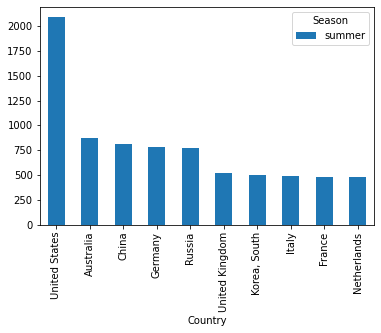

In [192]:
top_10_season_df[['summer']].plot(kind="bar");

In [200]:
all_df[(all_df.Year==2008) & (all_df.Event=='Basketball') & (all_df.Medal=='Gold')].head(3)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
5540,2008,Beijing,Basketball,Basketball,"ANTHONY, Carmelo",USA,Men,Basketball,Gold,United States,321418820.0,56115.718426,summer
5541,2008,Beijing,Basketball,Basketball,"BOOZER, Carlos",USA,Men,Basketball,Gold,United States,321418820.0,56115.718426,summer
5542,2008,Beijing,Basketball,Basketball,"BOSH, Chris",USA,Men,Basketball,Gold,United States,321418820.0,56115.718426,summer


In [ ]:
#Create a new dataframe showing the top ten countries by total event wins since 1984.

#assign the new dataframe to a variable named top_10_events_df
#The dataframe should have 10 rows and 1 column called Event Count

In [ ]:
all_df[all_df["Year"] >= 1984].groupby(["Country"]).count().unstack()
top_10_events_df = all_df.sort_values(by='Total', ascending=False).head(5)

In [219]:
top_10_events_df.head(10)

      Country    
Year  Afghanistan      2
      Algeria         15
      Argentina      173
      Armenia         11
      Australia      876
      Austria         28
      Azerbaijan      26
      Bahamas         23
      Bahrain          1
      Barbados         1
dtype: int64

In [230]:
all_events_df.head(3)

,Year,City,Sport,Discipline,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346,summer
1,1896,Athens,Aquatics,Swimming,HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346,summer
2,1896,Athens,Athletics,Athletics,HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346,summer


In [228]:
all_events_df = all_df.drop(columns='Athlete')
print('Total medal rows: ', all_events_df.shape[0])

Total medal rows:  62677


In [231]:
all_events_df.drop_duplicates(inplace=True)
all_events_df.shape

(30018, 12)